In [1]:
import sys
import json
import matplotlib.pyplot as plt

sys.path.append("..")

In [2]:
from src.mcmc import cross_validation, eval_solutions
from src.cipher_utils import create_encryption_dict, encode

In [3]:
text = "Whiskers was no ordinary cat he believed he was a pirate. Each morning, he climbed the tallest shelf in the house, meowed like a captain, and batted down anything in his path. One day, he discovered a crumpled treasure map under the rug. Tail high, he followed it through the garden, under the fence, and into the neighbors shed. There, among dusty boxes, he found his prize: a forgotten box of tuna. He purred victoriously, the fearless feline captain of Tuna Island.".lower()

In [4]:
with open("../data/en_perc_dict.json") as file:
    perc_dict = json.load(file)

encryption_dict = create_encryption_dict()
encoded_text = encode(text, encryption_dict)
attempts = 10
iters = 25000

In [5]:
solutions, scores = cross_validation(attempts, encoded_text, perc_dict, iters)

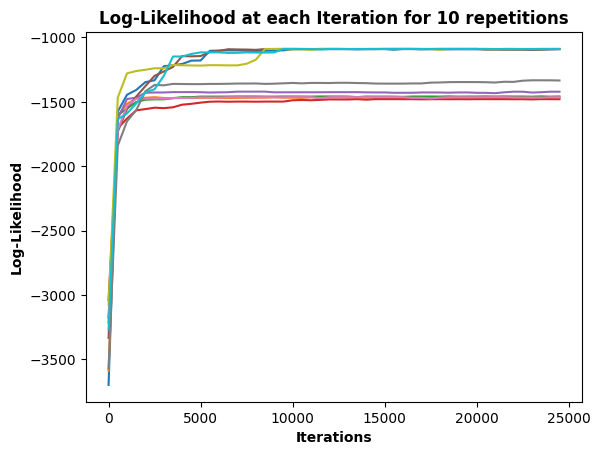

In [6]:
range_iters = list(range(0, iters, 500))
plt.xlabel("Iterations", fontweight = 'bold')
plt.ylabel("Log-Likelihood", fontweight = 'bold')
plt.title("Log-Likelihood at each Iteration for 10 repetitions", fontweight = 'bold')
for i in range(len(scores)):
    plt.plot(range_iters, scores[i])
plt.show()

In [7]:
correct_decoding_ratio = eval_solutions(text, solutions)
print(f"For {attempts} attempts with {iters} iterations each, the algorithm found the correct solution with {correct_decoding_ratio} success ratio.")

For 10 attempts with 25000 iterations each, the algorithm found the correct solution with 0.2 success ratio.
